To extract bbox for a category (here we use backpack as an example). This ipython file is present in the PythonAPI folder inside coco api tool.

In [1]:
%matplotlib inline
from pycocotools.coco import COCO           # 
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
from gluoncv import data, utils

Set location of annotation file 

In [2]:
dataDir='..'
print(dataDir)
dataType='train2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
print(annFile)

..
../annotations/instances_train2014.json


In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)
print(coco)

loading annotations into memory...
Done (t=10.43s)
creating index...
index created!


*********Extract category id from category name

In [4]:
catIds = coco.getCatIds(catNms=['backpack']);
print(catIds)


[27]


To extract all images that have the category ('backpack')

In [5]:
imgIds = coco.getImgIds(catIds=catIds );
print("Number images containing backpack is %s"%len(imgIds))

Number images containing backpack is 3924


# to extract bbox of "backpacks" present in all images

401435
{'date_captured': '2013-11-20 06:46:53', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000401435.jpg', 'file_name': 'COCO_train2014_000000401435.jpg', 'id': 401435, 'width': 640, 'flickr_url': 'http://farm4.staticflickr.com/3511/4001465235_c0f18024a8_z.jpg', 'license': 1, 'height': 429}


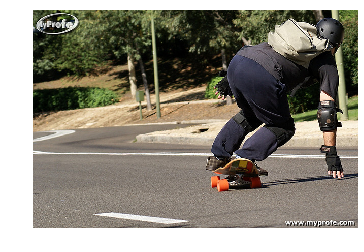

height is 429
image width is 640
[462.63, 15.59, 126.83, 100.73]
<class 'list'>
<class 'tuple'>
(0.8219453125, 0.15374125874125874, 0.198171875, 0.23480186480186482)


In [89]:
for imgId in imgIds[11:12]:               #loop through all images in one category
    print(imgId)
    img = coco.loadImgs(imgId)[0] #to extract all the informations of an image
    print(img)
    
    I = io.imread(img['coco_url'])
    plt.axis('off')
    plt.imshow(I)
    plt.show()
    img_height = img['height']
    print("height is %s" %img_height)
    img_width =  img['width']
    print("image width is %s"%img_width)
    annIds = coco.getAnnIds(imgId, catIds=catIds, iscrowd=None)  #extract all the annotations for the category backpack
    #print(annIds)
    anns = coco.loadAnns(annIds)
    #print(anns)
    for ann in anns[:2]: #loop through each annotation 
        bbox_is = ann['bbox']
        print(bbox_is)
        print(type(bbox_is))
        #xmin, ymin, xmax, ymax = [int(x) for x in bbox_is]
        #utils.viz.plot_bbox(I, bbox_is, scores=None)
        #plt.show()
        bb = convert((img_width, img_height), bbox_is)[:4]
        print(type(bb))
        print(bb)

In [6]:
utils.viz.plot_bbox(img.asnumpy(), bbox_is, scores=None)
plt.show()

NameError: name 'img' is not defined

In [88]:
def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = box[0] + (box[2]/ 2.0) 
    y = box[1] + (box[3]/ 2.0)
    x = x*dw
    y = y*dh
    w = box[2]*dw
    h = box[3]*dh
    return (x,y,w,h)

In [76]:
def convertabc(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    #x = (box[0] + box[2])/ 2.0 
    #y = (box[1] + box[3])/ 2.0
    x = box[0]*dw
    y = box[1]*dh
    w = box[2]*dw
    h = box[3]*dh
    return (x,y,w,h)